In [12]:
#Importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
#Importing Data
df = pd.read_csv("ex1data2.txt")
df.describe() #Gives you a summary of the data so you can understand the data in a better way
df.head()  #Show the first 5 entries of the data



,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Text(0.5, 1.0, 'Size V/S Price')

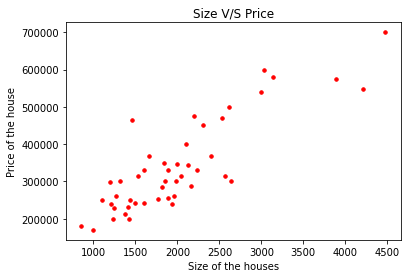

In [14]:
#Dividing the data into features and target 
#A visualization of the data to understand it better
x = df[["size","bedrooms"]]
y = df["price"]

plt.scatter(x["size"],y,c = "red",s = 12)
plt.xlabel("Size of the houses")
plt.ylabel("Price of the house")
plt.title("Size V/S Price")




In [15]:
#Feature Scaling is really important for this problem

def NormalizeData(data):
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    
    X = (data - mean)/std
    
    return X , mean , std


x,mean_x,std_x = NormalizeData(x)
Y,mean_y,std_y = NormalizeData(y)


X = np.column_stack((np.ones((x.shape[0],1)),x))
Y = np.resize(Y.to_numpy(), (x.shape[0],1))



In [16]:
#Initializing Parameters
alpha = 0.03
iterations = 2000
theta  = np.zeros((3,1))

In [17]:
def cost_function(X,Y,theta):
    m = X.shape[0]
    avg = 1/(2*m)

    estimate = np.square(np.dot(X,theta)-Y)
    sqr_estimate = np.sum(estimate)
    cost = avg * sqr_estimate
    return cost

print(cost_function(X,Y,theta))

0.5


In [18]:
def gradient_descent(X,Y,theta,alpha,iterations):
    m = X.shape[0]
    J_history = []

    for i in range(iterations):
        hyp = np.dot(X,theta)
        prediction = np.dot(X.transpose(),(hyp - Y))
        descent =alpha * 1/m * prediction
        theta-=descent
        J_history.append(cost_function(X,Y,theta))

    return J_history

J_history = gradient_descent(X,Y,theta,alpha,iterations)

h(x) = -0.0 + 0.88x1 + -0.05x2


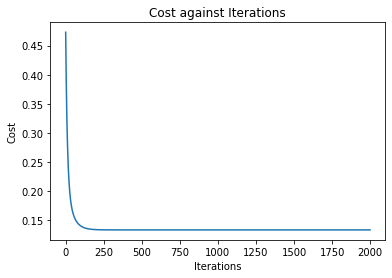

In [19]:
#Visualizing if cost is decreasing or not with iteration to verify gradient descent
plt.plot(J_history)
plt.title("Cost against Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")

#Print the hypothesis equation

print("h(x) = {} + {}x1 + {}x2".format((round(theta[0,0],2)),(round(theta[1,0],2)),(round(theta[2,0],2))))

In [20]:
def predict(x,theta):
    predictions= np.dot(x,theta)
    return predictions[0]

x_sample = np.array([1650,3])
x_sample = NormalizeData(x_sample)[0]


x_sample=np.append(np.ones(1),x_sample)

prediction = predict(x_sample,theta)

prediction = ((prediction*std_y) + mean_y)
print("For size of house = 1650, Number of bedroom = 3, the predicted value of price is ${}".format(round(prediction,0)))

For size of house = 1650, Number of bedroom = 3, the predicted value of price is $456439.0
